<a href="https://colab.research.google.com/github/vineetisb/GENAI/blob/main/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will
#list the files in the input directory
# print(os.listdir("../input"))

In [ ]:
# Load data as Pandas dataframe
test = pd.read_csv('/content/drive/MyDrive/datasets/titanic_test_clean.csv', )
train = pd.read_csv('/content/drive/MyDrive/datasets/titanic_train_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)

def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)


display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,1309.0,NaN,NaN,NaN,0.883881,1.583639,0.0,0.0,0.0,1.0,10.0
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We need to convert all categorical variables into numeric format. The categorical variables we will be keeping are Embarked, Sex and Title.

The Sex variable can be encoded into single 1-or-0 column, but the other variables will need to be one-hot encoded. Regular label encoding assigns some category labels higher numerical values. This implies some sort of scale (Embarked = 1 is not more than Embarked = 0 - it's just different). One Hot Encoding avoids this problem.

We will assume that there is some ordinality in the Pclass variable, so we will leave that as a single column.

In [ ]:
df.head(10)

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
5,30.0,NaN,Q,0,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr
6,54.0,E46,S,0,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr
7,2.0,NaN,S,4,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master
8,27.0,NaN,S,2,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs
9,14.0,NaN,C,1,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs


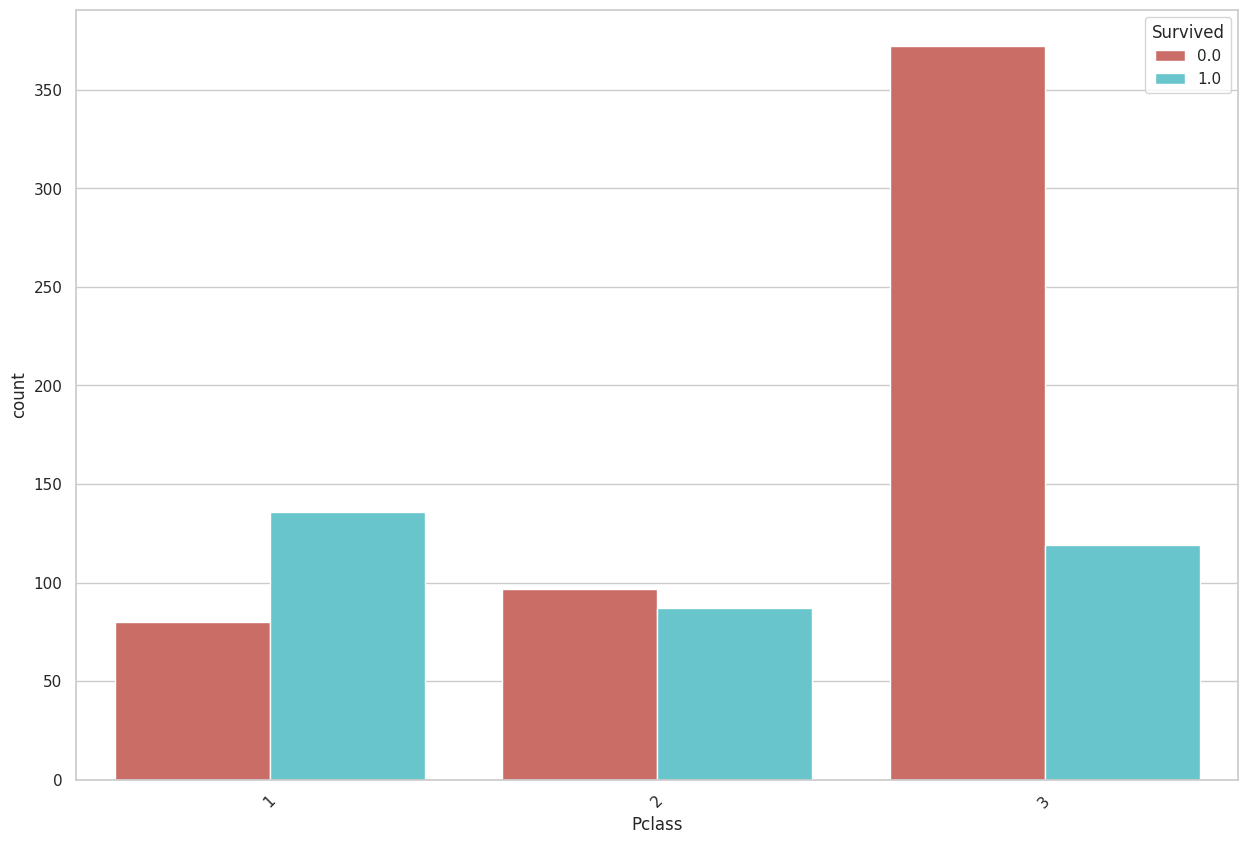

In [ ]:
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

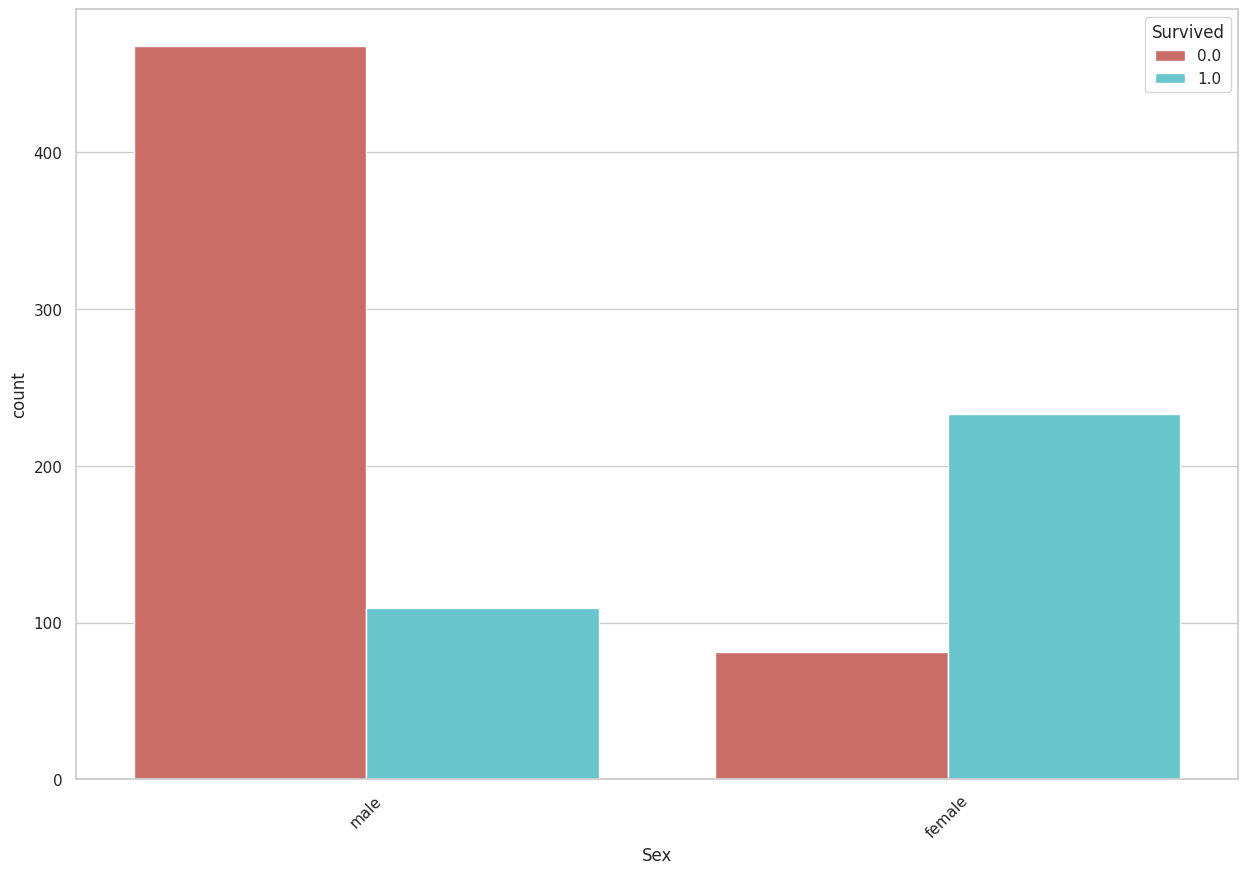

In [ ]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

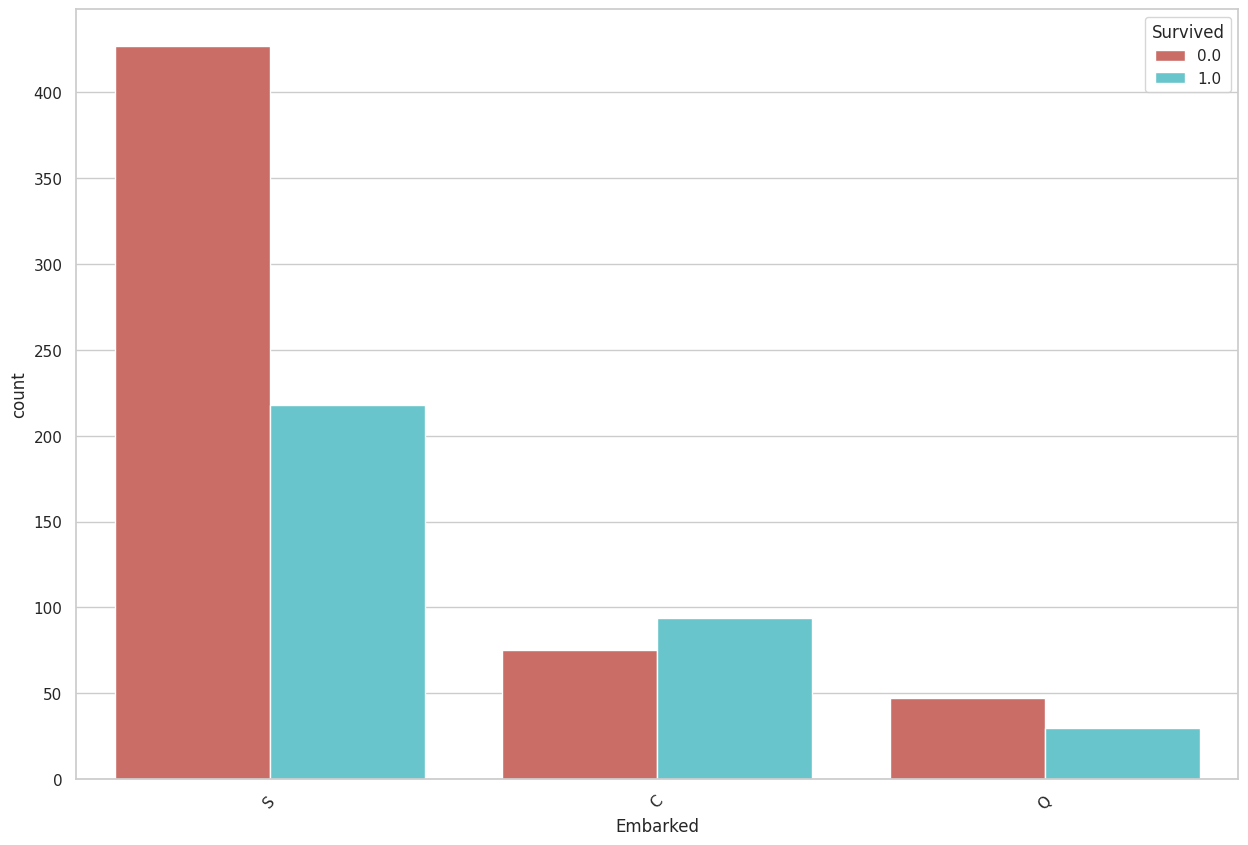

In [ ]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# convert to category dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

# subset all categorical variables which need to be encoded
categorical = ['Embarked', 'Title']

for var in categorical:
    df = pd.concat([df,
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

# drop the variables we won't be using
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

df.head()

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,False,False,True,False,False,False,True,False,False
1,38.0,1,71.2833,0,1,0,1,1.0,True,False,False,False,False,False,False,True,False
2,26.0,0,7.9250,0,3,0,0,1.0,False,False,True,False,False,True,False,False,False
3,35.0,1,53.1000,0,1,0,1,1.0,False,False,True,False,False,False,False,True,False
4,35.0,0,8.0500,0,3,1,0,0.0,False,False,True,False,False,False,True,False,False


In [ ]:
train = df[pd.notnull(df['Survived'])]
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

Validation set
Since we can't use our test set to assess our model (it doesn't have any labels), we will create a separte 'validation set'. We will use this set to test how our model generalises to unseen data.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    train.drop(['Survived'], axis=1),
    train['Survived'],
    test_size=0.2, random_state=42)

for i in [X_train, X_val, X_test]:
    print(i.shape)

(712, 16)
(179, 16)
(418, 16)


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
accuracy_score(y_val, rf.predict(X_val))

0.8379888268156425

Keeping a separate validation set means that we have less data on which to train our model. Cross-validation allows us to train our model on all of the data, while still assessing its performance on unseen data.

K-folds cross validation is the process of creating k different train/validate splits in the data and training the model k times.

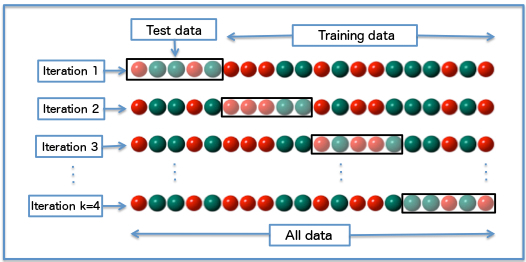


In the image above, k=4. This means that the model will be trained 4 times, each time using 1/4 of the data for validation. In this way, each of the four 'folds' takes one turn sitting out from training and is used as the validation set.

Let's combine our train and validation sets back into one training set, and then use cross-validation to assess our model:

In [ ]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

rf = RandomForestClassifier(n_estimators=10, random_state=42)
cross_val_score(rf, X_train, y_train, cv=5)


array([0.78971963, 0.79439252, 0.77570093, 0.94392523, 0.92990654])

In [ ]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8467289719626168

Grid search allows us to do this for multiple parameters simultaneously. We will select a few different parameters that we want to tune, and for each one we will provide a few different values to try out. Then grid search will fit models to every possible combination of these parameter values and use cross-validation to assess the performance in each case.

Furthermore, since we are using CV, we don't need to keep a separate validation set.

We have set out a total of  4×4=16
  models over which to search. Grid search uses cross-validation on each of the models, so if we use 3-folds cross-validation, that will leave us with 48 different fits to try out. (You can see how the number of fits can grow pretty quickly as we increase the number of parameters!)

The good news is that SkLearn's grid search allows us to run the job in parallel. Including the n_jobs=-1 argument below let's grid search run on all of the available cores on the host machine.

In [ ]:
# create the grid
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

# create the default model
rf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [ ]:
grid_result.best_estimator_
grid_result.best_score_

0.8299001248439449

In [ ]:
#But let's take a look at all of the models so we can make a more informed decision

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.829900 using {'max_depth': 5, 'n_estimators': 1000}
0.784128 (0.011844) with: {'max_depth': None, 'n_estimators': 10}
0.800966 (0.023660) with: {'max_depth': None, 'n_estimators': 100}
0.806568 (0.020755) with: {'max_depth': None, 'n_estimators': 1000}
0.805634 (0.021040) with: {'max_depth': None, 'n_estimators': 2000}
0.821497 (0.013766) with: {'max_depth': 5, 'n_estimators': 10}
0.826165 (0.012772) with: {'max_depth': 5, 'n_estimators': 100}
0.829900 (0.015639) with: {'max_depth': 5, 'n_estimators': 1000}
0.829900 (0.015639) with: {'max_depth': 5, 'n_estimators': 2000}
0.796297 (0.027069) with: {'max_depth': 10, 'n_estimators': 10}
0.823390 (0.020137) with: {'max_depth': 10, 'n_estimators': 100}
0.823385 (0.018120) with: {'max_depth': 10, 'n_estimators': 1000}
0.820584 (0.018527) with: {'max_depth': 10, 'n_estimators': 2000}
0.782255 (0.009259) with: {'max_depth': 20, 'n_estimators': 10}
0.800032 (0.024237) with: {'max_depth': 20, 'n_estimators': 100}
0.806568 (0.020755) with

Leaf size
The min_samples_leaf argument controls the size of the leaves in the trees.

We will set out the grid in a similar manner as before, only this time we will use the max_depth and n_estimators parameters that we found above.

In [ ]:
# create the grid
leaf_samples = [1, 2, 3, 4, 5, 6]
param_grid = dict(min_samples_leaf=leaf_samples)

# create the model with new max_depth and n_estimators
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832706 using {'min_samples_leaf': 3}
0.829900 (0.015639) with: {'min_samples_leaf': 1}
0.831773 (0.015029) with: {'min_samples_leaf': 2}
0.832706 (0.014019) with: {'min_samples_leaf': 3}
0.831768 (0.014013) with: {'min_samples_leaf': 4}
0.831768 (0.014013) with: {'min_samples_leaf': 5}
0.832706 (0.014019) with: {'min_samples_leaf': 6}


Bootstrap aggregating (or bagging) is a special case of the random forest where we bootstrap (sample with replacement) from the n training obersvations to create a new training set of size n for each tree. Furthermore, each tree considers all variables when making each split.

We can use grid search to determine if bootstrapping will be an appropriate method to use.

In [ ]:
# create the grid
max_features = [5, 8, 10, 12, None]
bootstrap = [True, False]
param_grid = dict(max_features=max_features, bootstrap=bootstrap)

# create the model with new leaf size
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832701 using {'bootstrap': True, 'max_features': 5}
0.832701 (0.017408) with: {'bootstrap': True, 'max_features': 5}
0.830834 (0.010682) with: {'bootstrap': True, 'max_features': 8}
0.829900 (0.009362) with: {'bootstrap': True, 'max_features': 10}
0.823359 (0.008046) with: {'bootstrap': True, 'max_features': 12}
0.823364 (0.006865) with: {'bootstrap': True, 'max_features': None}
0.830839 (0.013810) with: {'bootstrap': False, 'max_features': 5}
0.828966 (0.010064) with: {'bootstrap': False, 'max_features': 8}
0.826171 (0.008195) with: {'bootstrap': False, 'max_features': 10}
0.821497 (0.006947) with: {'bootstrap': False, 'max_features': 12}
0.806555 (0.011231) with: {'bootstrap': False, 'max_features': None}


In [ ]:
#Finally, we can attempt to predict which passengers in the test set survived.

rf = grid_result.best_estimator_
cross_val_score(rf, X_train, y_train, cv=5).mean()


0.8317757009345794

In [ ]:
test['Survived'] = rf.predict(X_test)

In [ ]:
solution = test[['PassengerId', 'Survived']]
solution['Survived'] = solution['Survived'].apply(int)

<ipython-input-26-045cc2177bcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution['Survived'] = solution['Survived'].apply(int)


In [ ]:
solution.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:
solution.to_csv("/content/drive/MyDrive/datasets/Random_Forest_Solution.csv", index=False)